In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

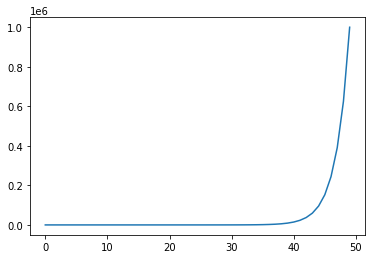

In [2]:
plt.plot(np.logspace(-4, 6))

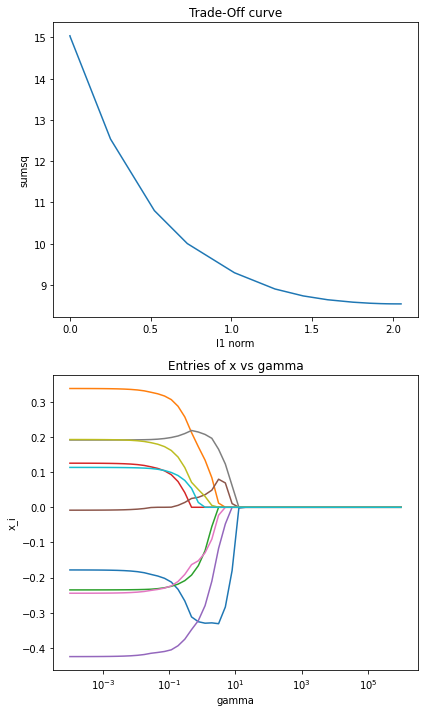

In [3]:
'''
LASSO problem trade-off curves
    cvxpy parameters
'''
# data
n = 15
m = 10
np.random.seed(1)
A = np.random.randn(n,m)
b = np.random.randn(n)
gamma = cp.Parameter(nonneg=True) # must be nonneg due to DCP rules

# problem
x = cp.Variable(m)
error = cp.sum_squares(A@x - b)
obj = cp.Minimize(error + gamma*cp.norm(x,1))
prob = cp.Problem(obj)

# trade-off curve 
# ||Ax-b||^2 vs ||x||_1
sq_penalty = []
l1_penalty = []
x_values = []
gamma_vals = np.logspace(-4, 6)
for val in gamma_vals:
    gamma.value = val
    prob.solve()
    sq_penalty.append(error.value)
    l1_penalty.append(cp.norm(x,1).value)
    x_values.append(x.value)

plt.figure(figsize=(6, 10))

# plot trade-off curve
plt.subplot(211)
plt.plot(l1_penalty, sq_penalty)
plt.xlabel('l1 norm')
plt.ylabel('sumsq')
plt.title('Trade-Off curve')

# plot entries of x vs gammma
plt.subplot(212)
for i in range(m):
    plt.plot(gamma_vals, [xi[i] for xi in x_values])
plt.xlabel('gamma')
plt.ylabel('x_i')
plt.xscale('log')
plt.title('Entries of x vs gamma')

plt.tight_layout()
plt.show()